In [78]:
import struct
import numpy as np
from sklearn import neighbors,metrics
import matplotlib.pyplot as plt
import gzip
%matplotlib inline

In [79]:
def read_idx(filename) :
  with gzip.open(filename) as f:
      zero,data_type,dims=struct.unpack('>HBB',f.read(4))
      shape = tuple(struct.unpack('>I',f.read(4))[0] for d in range(dims))
      return np.fromstring(f.read(),dtype=np.uint8).reshape(shape)
 

In [80]:
raw_train = read_idx("/content/train-images-idx3-ubyte.gz")
train_data =np.reshape(raw_train,(60000,28*28))  
train_label =read_idx("/content/train-labels-idx1-ubyte.gz")  
raw_test = read_idx("/content/t10k-images-idx3-ubyte.gz")
test_data =np.reshape(raw_test,(10000,28*28))  
test_label =read_idx("/content/t10k-labels-idx1-ubyte.gz")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  """


In [81]:
train_label.shape

(60000,)

In [82]:
idx = (train_label==2) | (train_label==3) | (train_label == 8) 

In [53]:
print(train_label[0:20])
print(idx[0:20])


[5 0 4 1 9 2 1 3 1 4 3 5 3 6 1 7 2 8 6 9]
[False False False False False  True False  True False False  True False
  True False False False  True  True False False]


In [83]:
x=train_data[idx]
y=train_label[idx]
knn=neighbors.KNeighborsClassifier(n_neighbors=3).fit(x,y)

In [84]:
idx = (test_label==2) | (test_label==3) | (test_label == 8)  
x_test=test_data[idx]   
y_true=test_label[idx] 
y_pred = knn.predict(x_test)

In [85]:
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
                horizontalalignment="center",
                color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')




Confusion matrix, without normalization
[[1025    3    4]
 [   5 1001    4]
 [   6   16  952]]


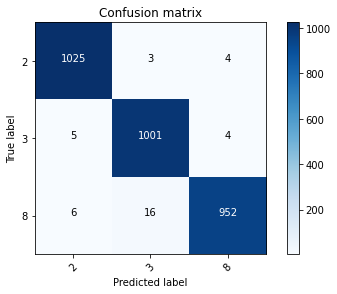

In [86]:
cm=metrics.confusion_matrix(y_true,y_pred)
plot_confusion_matrix(cm,["2","3","8"])

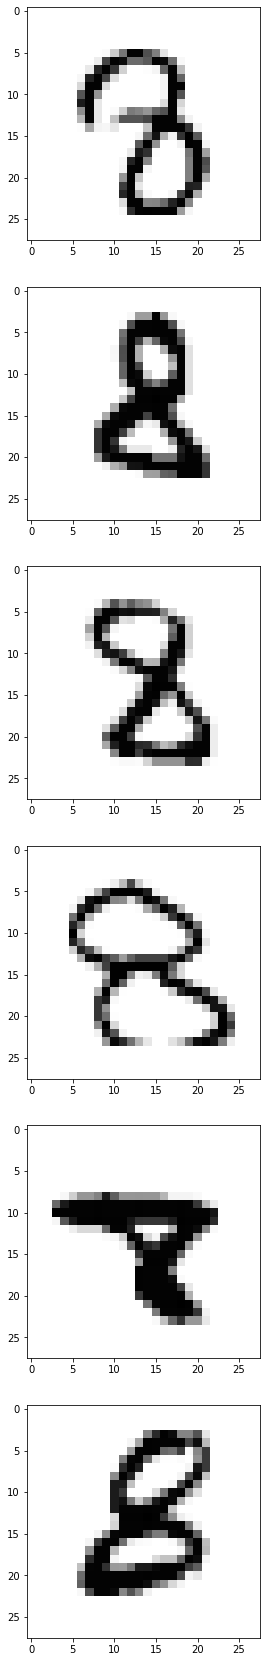

In [88]:
idx = np.where((y_pred == 2 ) & (y_true == 8))[0]
fig = plt.figure(figsize=(5,30))
for i in range(len(idx)):
    ax=fig.add_subplot(len(idx), 1 ,i+1)
    imgplot=ax.imshow(np.reshape(x_test[idx[i],:],(28,28)) , cmap=plt.cm.get_cmap("Greys"))
    imgplot.set_interpolation("nearest")
plt.show()